# **13장 과적합 피하기**

1988년 존스홉킨스대학교의 세즈노프스키 교수는 2년 전 힌튼 교수가 발표한 역전파 알고리즘에 관심을 가지고 있었습니다. 그는 은닉층과 역전파가 얼마나 큰 효과가 있는지를 직접 실험해보고 싶었습니다. 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터로 정리합니다. 오차 역전파 알고리즘을 사용한 신경망이 과연 얼마나 광석과 돌을 구분하는데 효과적인지 알아보기 위해서입니다.


**과적합 피하기 위해서 train set과 test set으로 나누어서 진행합니다**

In [ ]:
# 데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'sonar.csv'

#본문에 맞는 텐서플로 버전을 선택합니다.
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x

import tensorflow as tf
import pandas as pd
import numpy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

Saving sonar.csv to sonar.csv
     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 512kB 46.8MB/s 
     |████████████████████████████████| 3.8MB 47.9MB/s 
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.


In [ ]:
# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df = pd.read_csv(my_data, header=None)

# 데이터 개괄 보기
print(df.info())

# 데이터의 일부분 미리 보기
print(df.head())

#feature set은 61개, 데이터는 508개 밖에 없음
#feature set에 비해 데이터수가 적음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
dataset = df.values
X = dataset[:,0:60]
#X = numpy.asarray(X).astype(numpy, float32) #keras가 아닌 tensorflow.keras로 실행 시에 추가해야 하는 코드. 현재로서는 없어도 실행됨. 
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 208 samples
Epoch 1/200
208/208 [==============================] - 0s 2ms/sample - loss: 0.2509 - acc: 0.5385
Epoch 2/200
208/208 [==============================] - 0s 345us/sample - loss: 0.2358 - acc: 0.6346
Epoch 3/200
208/208 [==============================] - 0s 280us/sample - loss: 0.2254 - acc: 0.6923
Epoch 4/200
208/208 [==============================] - 0s 288us/sample - loss: 0.2134 - acc: 0.7452
Epoch 5/200
208/208 [==============================] - 0s 292us/sample - loss: 0.2055 - acc: 0.7308
Epoch 6/200
208/208 [==============================] - 0s 247us/sample - loss: 0.1961 - acc: 0.7500
Epoch 7/200
208/208 [==============================] - 0s 311us/sample - loss: 0.1866 - acc: 0.7885
Epoch 8/200
208/208 [==============================] - 0s 290us/sample - loss: 0.1751 - acc: 0.8317
Epoch 9/200
208/208 [==============================] - 0s 294us/sample - loss: 0.1763 - acc: 0.7788


과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도 합니다.

딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수들이 투입됩니다.

그래서 딥러닝을 진행하는 동안 과적합에 빠지지 않게 늘 주의해야 합니다.

In [ ]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

208/208 [==============================] - 0s 146us/sample - loss: 3.2455e-04 - acc: 1.0000

 Accuracy: 1.0000


accuracy가 지나치게 높게 나옵니다. 즉, 오버피팅이 일어납니다.

새로운 데이터에 대해서 적용하면 accuracy가 지금보다는 낮게 나올 것입니다.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


과적합을 방지하려면 학습을 하는 데이터셋과 이를 테스트할 데이터셋을 완전히 구분한 다음 학습과 동시에 테스트를 병행하며 진행하는 것이 한 방법입니다. 

데이터셋이 총 100개의 샘플로 이루어져 있다면 다음과 같이 두 개의 셋으로 나눕니다.

70개 샘플은 학습셋, 30개 샘플은 테스트셋


신경망을 만들어 70개의 샘플로 학습을 진행한 후 이 학습의 결과를 저장합니다. 이렇게 저장한 파일을 '**모델**'이라고 부릅니다. 모델은 다른 셋에 적용할 경우 학습 단계에서 각인되었던 그대로 다시 수행합니다. 나머지 30개의 샘플로 실험해서 정확도를 살펴보면 학습이 얼마나 잘 되어있는지를 알 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed) #테스트셋 비율을 30%로 잡음

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 145 samples
Epoch 1/130
145/145 [==============================] - 0s 615us/sample - loss: 0.2712 - acc: 0.5241
Epoch 2/130
145/145 [==============================] - 0s 283us/sample - loss: 0.2405 - acc: 0.6414
Epoch 3/130
145/145 [==============================] - 0s 286us/sample - loss: 0.2331 - acc: 0.6276
Epoch 4/130
145/145 [==============================] - 0s 286us/sample - loss: 0.2237 - acc: 0.6621
Epoch 5/130
145/145 [==============================] - 0s 295us/sample - loss: 0.2154 - acc: 0.7241
Epoch 6/130
145/145 [==============================] - 0s 275us/sample - loss: 0.2062 - acc: 0.7517
Epoch 7/130
145/145 [==============================] - 0s 272us/sample - loss: 0.1959 - acc: 0.7517
Epoch 8/130
145/145 [==============================] - 0s 287us/sample - loss: 0.1883 - acc: 0.7586
Epoch 9/130
145/145 [==============================] - 0s 285us/sample - loss: 0.1804 - acc: 0.7655
Epoch 10/130
145/145 [==============================] - 0s 308us/sample - loss:

Accuracy가 0.8254로 낮아진 것을 알 수 있습니다.

학습이 계속 되면 학습셋에서의 정확도는 계속 올라가지만 테스트셋에서는 과적합이 발생합니다.

테스트 에러가 커지는 순간 과적합이 발생하므로 그 전에 학습을 멈춰야 합니다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


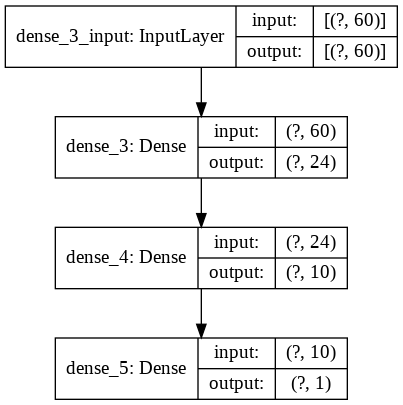

In [ ]:
from tensorflow import keras

model.summary()
keras.utils.plot_model(model, "myModel.png", show_shapes=True)

###**모델 저장** 
학습이 끝난 후 테스트해본 결과가 만족스러울 때 이를 모델로 저장하여 새로운 데이터에 사용할 수 있습니다. 앞서 학습한 결과를 모델로 저장하려면 다음과 같이 실행합니다.

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')  # 모델을 컴퓨터에 저장

del model       # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('my_model.h5') # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
63/63 [==============================] - 0s 522us/sample - loss: 0.1403 - acc: 0.8254

 Test Accuracy: 0.8254
